# Lab 1 - Neural Networks Basics
Learn the basics of neural networks and their underlying principles.

Objectives:
1. *Understand and code a simple neuron*
2. *Understand how a neuron learns*
3. *Understand its limitations*

In [101]:
# Start by importing the library Numpy.
import numpy as np

Now, let’s code our first neuron. The structure of a neuron is as follows:

<center><img src="https://miro.medium.com/max/1302/1*UA30b0mJUPYoPvN8yJr2iQ.jpeg" height="300"></center>

The function $𝑓(\cdot)$ represents the core of the neuron. For the time being, let’s consider the sigmoid function:
$$\sigma(x)=\frac{1}{1+e^{-(\vec{w}^T\vec{x}+b)}}$$
where $\vec{w} = (w_1,w_2,...,w_n)$ and $\vec{x} = (x_1,x_2,...,x_n)$ represent the $n$-dimensional vectors for the weights and inputs, $b$ is the bias and $(\cdot)^T$ is the transpose operator.

In [102]:
# Write the code required to simulate a neuron with 𝑛 = 2, a sigmoid activation function and random weights.

W = np.random.randn(1,2) # 1-by-2 array
B = np.random.randn(1)

def sigm(X, W, B):
    M = 1/(1+np.exp(-(X.dot(W.T)+B)))
    return M

Let’s briefly recall the logical operators. Logical or Boolean, functions are defined as
$g:{0,1}^n \rightarrow {0,1}$. A two dimensional (i.e., $n=2$) logical function would have the form $g(x_1,x_2)=y$ with $x_1,x_2,y \in {0,1}$.

By this point our neuron is not yet able to learn. In order to make our unit smarter, we are going to make use of the gradient descent method to update the weights, depending on the choice of an error function. For this laboratory, we will consider the squared error function.

$$E = (y-z)^2 \\[0.5em]
w_i^\prime = w_i + \eta\frac{dE}{dw_i} \\[0.5em]
b^\prime = b+\eta\frac{dE}{db}
$$

where $y$ is the correct output, $z$ is the current output of the neuron and $\eta$ is the learning rate. The error function is thus a measure of the difference between target ouput and current nerual net prediction. To minimise this, update the weights and biases to new values ($w_i^\prime, b^\prime$) using the gradient of $E$ with respect to $w_i$ and $b$.

**Exercise:** derive an analytical expression for the formulas above, considering that the derivative the sigmoid can be expressed as

$$\frac{d\sigma(s)}{ds} = \sigma(s)(1-\sigma(s))$$

Let $s = \vec{w}^T\vec{x}+b$, such that $\sigma(s) = z = \frac{1}{1+e^{-s}}$

\begin{split}
    \frac{dE}{dw}
    &= \frac{dE}{dz} * \frac{dz}{ds} * \frac{\partial s}{\partial w} \\
    &= -2(y-z) * \frac{d\sigma(s)}{ds} * x
\end{split}

\begin{split}
    \frac{dE}{db}
    &= \frac{dE}{dz} * \frac{dz}{ds} * \frac{\partial s}{\partial b} \\
    &= -2(y-z) * \frac{d\sigma(s)}{ds} * 1
\end{split}

The coefficient is negative as the weight incrementation is positive.

In [103]:
# Write functions to calculate the gradients.
# Write the update rules for your weights and bias.

# The coefficient of the derivate of the error has been omitted
# in the code here as it can be included in the learning rate

def diff_W(X, Z, Y, B, W):
    dS = sigm(X,W,B)*(1-sigm(X,W,B))
    dW = (Y-Z)*dS

    return X.T.dot(dW)

def diff_B(X, Z, Y, B, W):
    dS = sigm(X,W,B)*(1-sigm(X,W,B))
    dB = (Y-Z)*dS

    return dB.sum(axis=0)

In [104]:
# Now the final ingredients to teach our neuron are a training set and a test set.

# Create 15 two-dimensional samples and their respective outputs. This will be the set on which we will train our network.
X = np.random.randint(2, size=[15,2])
Y = np.array([X[:,0] | X[:,1]]).T

# Do the same for a testing set. This set will only be used to compute the error of our system.
X_Test = np.random.randint(2, size=[15,2])
Y_Test = np.array([X_Test[:,0] | X_Test[:,1]]).T

*Why is training not performed on the testing set?*

The training set is used to find the model's parameters. Meanwhile, the test set is to
see how well the model has learned and to detect over-fitting, rather than to have it learn more. This gives an indication of how good the model is.

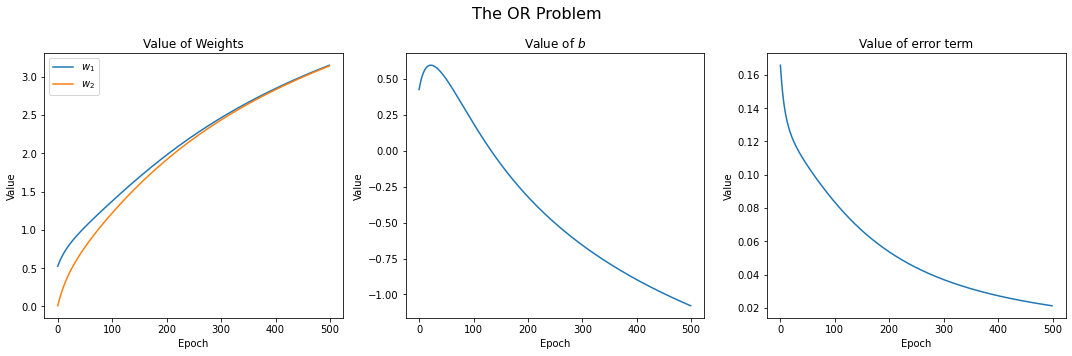

In [105]:
# Now, we can finally teach the neuron to emulate the OR function.
# Set the learning rate to a small number (0.01) and iterate over all the points in the training set, remembering to update the weights, for a large number of epochs.

import matplotlib.pyplot as plt

learning_rate = 0.05
w1_val = []
w2_val = []
b_val = []
error_val = []

num_epochs = 500

for epoch in range(num_epochs):
    output = sigm(X,W,B)
    
    W += learning_rate * diff_W(X, output, Y, B, W).T
    B += learning_rate * diff_B(X, output, Y, B, W)

    e_term = np.mean((Y-output)**2)
    error_val += [e_term]

    w1_val += [W[0][0]]
    w2_val += [W[0][1]]
    b_val += [B[0]]

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('The OR Problem', fontsize=16)

ax1.plot(w1_val, label='$w_1$')
ax1.plot(w2_val, label='$w_2$')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Value')
ax1.set_title('Value of Weights')
ax1.legend()

ax2.plot(b_val)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Value')
ax2.set_title('Value of $b$')

ax3.plot(error_val)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Value')
ax3.set_title('Value of error term')

fig.tight_layout()
plt.show()

*Does the error go to zero? Why not? What could we do to make it exactly zero?*

The error does not go to zero.

In [106]:
# Testing for the OR problem

W_trained = np.array([w1_val[-1], w2_val[-1]])
B_trained = b_val[-1]

out_test = sigm(X_Test,W_trained,B_trained)
e_term = np.mean((out_test - Y_Test)**2)

print(f'Trained W: {W_trained}')
print(f'Trained B: {B_trained}')
print(f'Error: {e_term}')

Trained W: [3.15167647 3.14253179]
Trained B: -1.07888810170846
Error: 0.233881675777


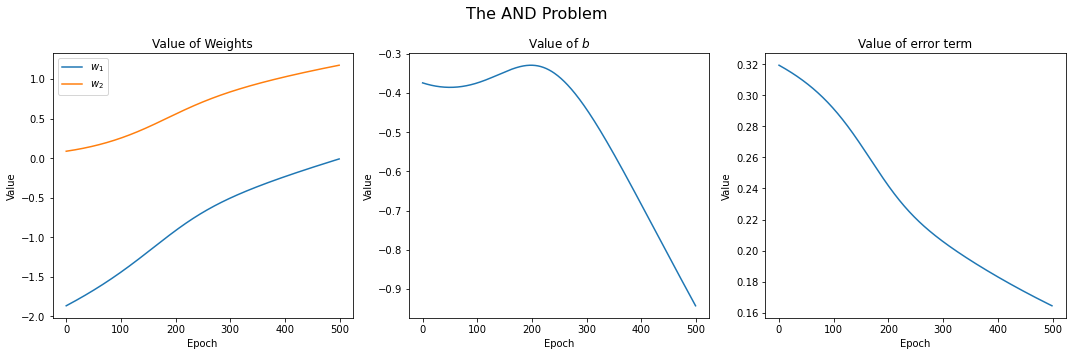

In [107]:
# Repeat the previous procedure for the AND operator

W = np.random.randn(1,2)
B = np.random.randn(1)

# Create 15 two-dimensional samples and their respective outputs.
X = np.random.randint(2, size=[15,2])
Y = np.array([X[:,0] & X[:,1]]).T

# Do the same for a testing set.
X_Test = np.random.randint(2, size=[15,2])
Y_Test = np.array([X_Test[:,0] & X_Test[:,1]]).T


# Now, we can finally teach the neuron to emulate the AND function.

learning_rate = 0.01
w1_val = []
w2_val = []
b_val = []
error_val = []

num_epochs = 500

for epoch in range(num_epochs):
    output = sigm(X,W,B)
    
    W += learning_rate * diff_W(X, output, Y, B, W).T
    B += learning_rate * diff_B(X, output, Y, B, W)

    e_term = np.mean((Y-output)**2)
    error_val += [e_term]

    w1_val += [W[0][0]]
    w2_val += [W[0][1]]
    b_val += [B[0]]

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('The AND Problem', fontsize=16)

ax1.plot(w1_val, label='$w_1$')
ax1.plot(w2_val, label='$w_2$')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Value')
ax1.set_title('Value of Weights')
ax1.legend()

ax2.plot(b_val)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Value')
ax2.set_title('Value of $b$')

ax3.plot(error_val)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Value')
ax3.set_title('Value of error term')

fig.tight_layout()
plt.show()

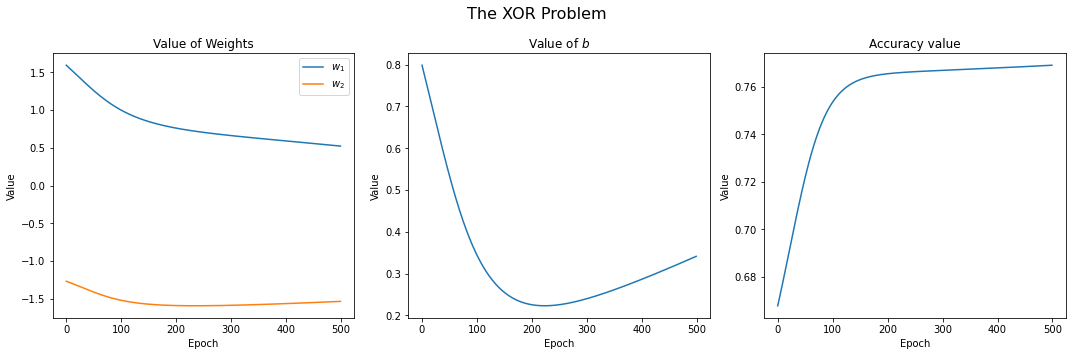

In [108]:
# Repeat the previous procedure for the XOR operator

W = np.random.randn(1,2) # 1-by-2 array
B = np.random.randn(1)

# Create 15 two-dimensional samples and their respective outputs.
X = np.random.randint(2, size=[15,2])
Y = np.array([X[:,0] ^ X[:,1]]).T

# Do the same for a testing set.
X_Test = np.random.randint(2, size=[15,2])
Y_Test = np.array([X_Test[:,0] ^ X_Test[:,1]]).T


# Now, we can finally teach the neuron to emulate the XOR function.

learning_rate = 0.01
w1_val = []
w2_val = []
b_val = []
acc_val = []

num_epochs = 500

for epoch in range(num_epochs):
    output = sigm(X,W,B)
    
    W += learning_rate * diff_W(X, output, Y, B, W).T
    B += learning_rate * diff_B(X, output, Y, B, W)

    accuracy = 1 - np.mean((Y-output)**2)
    acc_val += [accuracy]

    w1_val += [W[0][0]]
    w2_val += [W[0][1]]
    b_val += [B[0]]

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('The XOR Problem', fontsize=16)

ax1.plot(w1_val, label='$w_1$')
ax1.plot(w2_val, label='$w_2$')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Value')
ax1.set_title('Value of Weights')
ax1.legend()

ax2.plot(b_val)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Value')
ax2.set_title('Value of $b$')

ax3.plot(acc_val)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Value')
ax3.set_title('Accuracy value')

fig.tight_layout()
plt.show()

*Are we able to reproduce the XOR? Can you explain these results?*

Classifying AND and OR scenarios are easily carried out, simply separating classes using just a single line (achieved using a just one neuron). This cannot be said for and XOR problem, as the classes cannot be separated using a just one line. If sticking to linear hyperplanes, two lines are definitely needed to correctly separate the classes, which can be achieved if a multi-layer architecture with two inputs is used. The theoretical maximum accuracy that can be achieved is somewhere neear 75%.

*If you really wanted to solve the XOR just using one neuron, can you think of any solutions that we could apply?*

Use an activation function that is non-monotonic, resulting in a non-linear hyperplane. It is important that the activation function cuts the plane more than once, such as a periodic/sinusoidal, absolute, or gaussian function. 